<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br><br><br>

# Listed Volatility and Variance Derivatives

**Dr. Yves J. Hilpisch &mdash; Wiley Finance (2016)**

<img src="http://hilpisch.com/images/lvvd_cover.png" alt="Derivatives Analytics with Python" width="30%" align="left" border="0">

# Trading and Settlement

## Introduction

## Overview of Variance Futures Terms

## Intraday Trading

In [1]:
import numpy as np

In [2]:
a = np.random.standard_normal((10))

In [3]:
np.round(a)

array([-0.,  1.,  1., -1., -1., -1.,  0., -1.,  2.,  2.])

In [4]:
import warnings; warnings.simplefilter('ignore')

In [5]:
import pandas as pd
h5 = pd.HDFStore('data/var_data.h5', 'r')
data = h5['var_future']
h5.close()
data.head()

,SX5E,V6I1,2w,EONIA,R_t,sigma**2,t,DF_t,F_tS,ARMVM_t
Date,,,,,,,,,,
2015-06-01,3575.04,25.8710,-0.108,-0.106,NaN,NaN,1,1.000038,3000,0.000000
2015-06-02,3561.89,25.9232,-0.109,-0.122,-0.003685,34.220799,2,1.000036,2917,0.000000
2015-06-03,3583.82,25.7958,-0.109,-0.143,0.006138,64.580457,3,1.000033,2875,0.040173
2015-06-04,3556.38,26.2418,-0.109,-0.138,-0.007686,92.677552,4,1.000030,2860,0.111062
2015-06-05,3510.01,27.4496,-0.109,-0.115,-0.013124,178.023718,5,1.000027,2892,0.187647


In [6]:
T = data['t'][-1]
T
sigma_K = data['V6I1'][0]
sigma_K

25.870999999999999

In [7]:
data['F_ti'] = 3000.0
for t in data.index[2:]:
    data.loc[t, 'F_ti'] = data['DF_t'].shift(1)[t] * (
                    (data['t'][t]  * data['sigma**2'].shift(1)[t]
                  + (T - data['t'][t]) * data['V6I1'].shift(1)[t] ** 2) / T
                  - sigma_K ** 2) - data['ARMVM_t'].shift(1)[t] + 3000

In [8]:
data

,SX5E,V6I1,2w,EONIA,R_t,sigma**2,t,DF_t,F_tS,ARMVM_t,F_ti
Date,,,,,,,,,,,
2015-06-01,3575.04,25.8710,-0.108,-0.106,NaN,NaN,1,1.000038,3000,0.000000,3000.000000
2015-06-02,3561.89,25.9232,-0.109,-0.122,-0.003685,34.220799,2,1.000036,2917,0.000000,3000.000000
2015-06-03,3583.82,25.7958,-0.109,-0.143,0.006138,64.580457,3,1.000033,2875,0.040173,2875.140910
2015-06-04,3556.38,26.2418,-0.109,-0.138,-0.007686,92.677552,4,1.000030,2860,0.111062,2835.844331
2015-06-05,3510.01,27.4496,-0.109,-0.115,-0.013124,178.023718,5,1.000027,2892,0.187647,2820.555454
2015-06-08,3468.31,27.2996,-0.110,-0.127,-0.011951,214.408816,6,1.000025,2863,0.236836,2853.797523
2015-06-09,3456.79,26.8020,-0.110,-0.126,-0.003327,183.323049,7,1.000022,2799,0.305743,2827.984087
2015-06-10,3526.48,25.8610,-0.111,-0.117,0.019960,300.555651,8,1.000019,2802,0.406065,2763.381425
2015-06-11,3551.91,26.3897,-0.111,-0.120,0.007185,279.249096,9,1.000016,2776,0.497784,2778.130966


In [9]:
futures = 100000. / (2 * 26) * T / (T - data['t']['2015-06-09'])
futures

3605.769230769231

In [10]:
F_ti = data['F_ti']['2015-06-09']
F_ti

2827.9840866529353

In [11]:
sigma_t2 = (data['t']['2015-06-09'] * data['sigma**2']['2015-06-09']
         + (T - data['t']['2015-06-09']) * 26 ** 2) / T
sigma_t2

446.08408975063566

In [12]:
F_t = (data['DF_t']['2015-06-09'] *
       (sigma_t2 - data['V6I1']['2015-06-01'] ** 2)
              - data['ARMVM_t']['2015-06-09'] + 3000)
F_t

2776.4648130015858

In [13]:
P_ti = futures * F_t
P_ti

10011291.393034564

## Trade Matching

In [14]:
F_tS = data['F_tS']['2015-06-09']
F_tS

2799

In [15]:
P_t = futures * F_tS
P_t

10092548.076923078

In [16]:
P_t - P_ti

81256.683888513595

In [17]:
100000 * (data['V6I1']['2015-06-09'] - 26)

80199.999999999956

## Different Traded Volatilities

In [18]:
import numpy as np
trad_vols = np.arange(15, 25.01, 1)
trad_vols

array([ 15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,  24.,  25.])

In [19]:
sigma_t2 = (data['t']['2015-06-09'] * data['sigma**2']['2015-06-09']
         + (T - data['t']['2015-06-09']) * trad_vols ** 2) / T
sigma_t2

array([ 205.55075642,  222.08408975,  239.68408975,  258.35075642,
        278.08408975,  298.88408975,  320.75075642,  343.68408975,
        367.68408975,  392.75075642,  418.88408975])

In [20]:
F_t = (data['DF_t']['2015-06-09']
       * (sigma_t2 - data['V6I1']['2015-06-01'] ** 2)
               - data['ARMVM_t']['2015-06-09'] + 3000)
F_t

array([ 2535.92620765,  2552.45990336,  2570.06028912,  2588.72736492,
        2608.46113077,  2629.26158666,  2651.12873261,  2674.06256859,
        2698.06309463,  2723.13031071,  2749.26421683])

In [21]:
margins = futures * (F_tS - F_t)
margins

array([ 948583.3858882 ,  888966.69461993,  825503.76520532,
        758194.59764436,  687039.19193707,  612037.54808344,
        533189.66608347,  450495.54593716,  363955.18764451,
        273568.59120552,  179335.75662018])

In [22]:
import seaborn as sns; sns.set()
import matplotlib
matplotlib.rcParams['font.family'] = 'serif'
%matplotlib inline

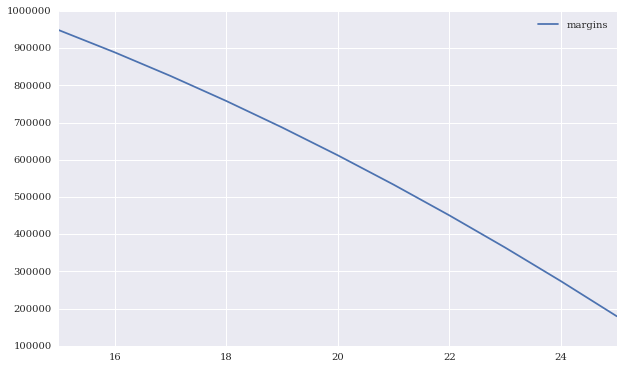

In [23]:
results = pd.DataFrame({'margins': margins}, index=trad_vols)
results.plot(figsize=(10, 6));

## After the Trade Matching

In [24]:
F_diffs = (data['F_tS'] - data['F_tS'].shift(1))
F_diffs

Date
2015-06-01     NaN
2015-06-02   -83.0
2015-06-03   -42.0
2015-06-04   -15.0
2015-06-05    32.0
2015-06-08   -29.0
2015-06-09   -64.0
2015-06-10     3.0
2015-06-11   -26.0
2015-06-12    51.0
2015-06-15    85.0
2015-06-16   -54.0
2015-06-17   -94.0
2015-06-18   -75.0
2015-06-19   -82.0
Name: F_tS, dtype: float64

In [25]:
margin_t = futures * F_diffs[F_diffs.index >= '2015-06-09']
margin_t

Date
2015-06-09   -230769.230769
2015-06-10     10817.307692
2015-06-11    -93750.000000
2015-06-12    183894.230769
2015-06-15    306490.384615
2015-06-16   -194711.538462
2015-06-17   -338942.307692
2015-06-18   -270432.692308
2015-06-19   -295673.076923
Name: F_tS, dtype: float64

In [26]:
results = pd.DataFrame(np.tile(margin_t, (len(trad_vols), 1)).T,
                       index=margin_t.index,
                       columns=trad_vols)
results.loc['2015-06-09', :] = margins  # setting the first day margins
np.round(results)

,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0
Date,,,,,,,,,,,
2015-06-09,948583.0,888967.0,825504.0,758195.0,687039.0,612038.0,533190.0,450496.0,363955.0,273569.0,179336.0
2015-06-10,10817.0,10817.0,10817.0,10817.0,10817.0,10817.0,10817.0,10817.0,10817.0,10817.0,10817.0
2015-06-11,-93750.0,-93750.0,-93750.0,-93750.0,-93750.0,-93750.0,-93750.0,-93750.0,-93750.0,-93750.0,-93750.0
2015-06-12,183894.0,183894.0,183894.0,183894.0,183894.0,183894.0,183894.0,183894.0,183894.0,183894.0,183894.0
2015-06-15,306490.0,306490.0,306490.0,306490.0,306490.0,306490.0,306490.0,306490.0,306490.0,306490.0,306490.0
2015-06-16,-194712.0,-194712.0,-194712.0,-194712.0,-194712.0,-194712.0,-194712.0,-194712.0,-194712.0,-194712.0,-194712.0
2015-06-17,-338942.0,-338942.0,-338942.0,-338942.0,-338942.0,-338942.0,-338942.0,-338942.0,-338942.0,-338942.0,-338942.0
2015-06-18,-270433.0,-270433.0,-270433.0,-270433.0,-270433.0,-270433.0,-270433.0,-270433.0,-270433.0,-270433.0,-270433.0
2015-06-19,-295673.0,-295673.0,-295673.0,-295673.0,-295673.0,-295673.0,-295673.0,-295673.0,-295673.0,-295673.0,-295673.0


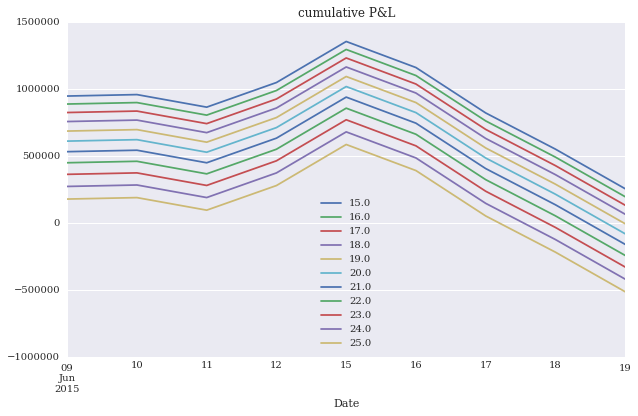

In [27]:
results.cumsum().plot(figsize=(10, 6), title='cumulative P&L');

## Further Details

### Interest Rate Calculation

### Market Disruption Events

## Conclusions

<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

<a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:team@tpq.io">team@tpq.io</a>

**DX Analytics** |
<a href="http://dx-analytics.com">http://dx-analytics.com</a>

**Quant Platform** |
<a href="http://quant-platform.com">http://quant-platform.com</a>

**Python for Finance Books** |
<a href="http://books.tpq.io" target="_blank">http://books.tpq.io</a>

**Python for Finance Training** |
<a href="http://training.tpq.io" target="_blank">http://training.tpq.io</a>